In [45]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [11]:
# # data visualization and exploring
# train_data_raw.isnull().sum()
# # sns.heatmap(train_data_raw.isnull(), cbar = False)

# # groups sex and pclass together then replaces the Age NA value with the median in their corresponding sex and pclass group
# grp = train_data_raw.groupby(['Sex', 'Pclass'])
# # grp.Age.apply(lambda x: x.fillna(x.median()))
# for name, group in grp:
#     group.Age.fillna(group.Age.median(), inplace=True)
# # fill the NA values with the medians in grp
# train_data_raw.Age.fillna(grp.Age.median, inplace = True)

# # # check that all ages slots have been filled
# # sns.heatmap(train_data_raw.isnull(), cbar = False)
# # print(train_data_raw.Age.isnull().any())

In [12]:
def clean_format_code(dataset):
    # groups sex and pclass together then replaces the Age NA value with the median in their corresponding sex and pclass group
    grp = dataset.groupby(['Sex', 'Pclass'])
    grp.Age.apply(lambda x: x.fillna(x.median()))
    # fill the NA values with the medians in grp)
    dataset.Age.fillna(dataset.Age.median(), inplace = True)
    
    dataset.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
    dataset.set_index(keys=['PassengerId'], drop=True, inplace=True)

    dataset_nan_map = {'Fare': dataset['Fare'].mean(), 'Embarked': dataset['Embarked'].mode()[0]}

    dataset.fillna(value=dataset_nan_map, inplace=True)
    
    columns_map = {'Sex': {'male': 1, 'female': 5}, 'Pclass': {1 : 'a', 2 : 'b', 3 : 'c'}}
    dataset.replace(columns_map, inplace=True)

    remap = {'Pclass' : {'a': 3, 'b' : 2, 'c' : 1}}
    dataset.replace(remap, inplace=True)

    dataset['SexPclass'] = dataset['Sex'] * dataset['Pclass']

    dataset.drop(columns=['Sex', 'Pclass'], inplace=True)
    
    # vectorizing Embarked
    dataset = pd.get_dummies(dataset, prefix=['Embarked'])

    scaler = StandardScaler().fit(dataset)
    rescaledX = scaler.transform(dataset)
    
    return dataset

In [13]:
train_data_raw = pd.read_csv('train.csv')
test_data_raw = pd.read_csv('test.csv')
train_data = clean_format_code(train_data_raw)
test_data = clean_format_code(test_data_raw)
# pd.get_dummies(train_data, prefix=['Embarked'])
print(train_data.head())
print(test_data.head())


             Survived   Age  SibSp  Parch     Fare  SexPclass  Embarked_C  \
PassengerId                                                                 
1                   0  22.0      1      0   7.2500          1           0   
2                   1  38.0      1      0  71.2833         15           1   
3                   1  26.0      0      0   7.9250          5           0   
4                   1  35.0      1      0  53.1000         15           0   
5                   0  35.0      0      0   8.0500          1           0   

             Embarked_Q  Embarked_S  
PassengerId                          
1                     0           1  
2                     0           0  
3                     0           1  
4                     0           1  
5                     0           1  
              Age  SibSp  Parch     Fare  SexPclass  Embarked_C  Embarked_Q  \
PassengerId                                                                   
892          34.5      0      0   7.

In [14]:
train_data_raw = pd.read_csv('train.csv')
test_data_raw = pd.read_csv('test.csv')
train_data = clean_format_code(train_data_raw)
test_data = clean_format_code(test_data_raw)

# mm_scaler = preprocessing.MinMaxScaler()
# X_train_minmax = mm_scaler.fit_transform(X_train)
# mm_scaler.transform(X_test)


# train_data = preprocessing.normalize(train_data, norm='l2')

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=10)

print(X_train.head())
print(y_train.head())
print(test_data.head())
# sns.heatmap(train_data.isnull(), cbar = False)
# print(train_data.Age.isnull().any())
# sns.heatmap(test_data.isnull(), cbar = False)
# print(test_data.Age.isnull().any())

              Age  SibSp  Parch    Fare  SexPclass  Embarked_C  Embarked_Q  \
PassengerId                                                                  
464          48.0      0      0  13.000          2           0           0   
160          28.0      8      2  69.550          1           0           0   
48           28.0      0      0   7.750          5           0           1   
403          21.0      1      0   9.825          5           0           0   
619           4.0      2      1  39.000         10           0           0   

             Embarked_S  
PassengerId              
464                   1  
160                   1  
48                    0  
403                   1  
619                   1  
PassengerId
464    0
160    0
48     1
403    0
619    1
Name: Survived, dtype: int64
              Age  SibSp  Parch     Fare  SexPclass  Embarked_C  Embarked_Q  \
PassengerId                                                                   
892          34.5      0   

In [15]:
# train_data.columns[train_data.isna().any()].tolist()
# train_data[train_data['Embarked'].isna() == True]
#train_data['Embarked']
#test_data.columns[test_data.isna().any()].tolist()

C:\Users\bomna\Anaconda3\envs\aadenv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8203389830508474
0.8271186440677966
0.8
0.8033898305084746
0.7627118644067796


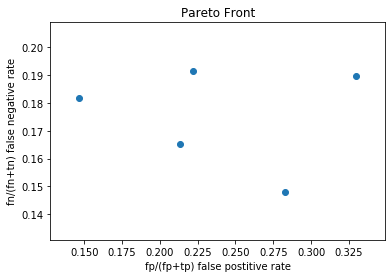

In [26]:
# for testing the 5 algos at once
xlist = []
ylist = []
NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
BYR = sgd(max_iter=800, penalty = 'l1')
BYR.fit(X_train.values, y_train.values)
print(BYR.score(X_test.values, y_test.values))
y_pred = BYR.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
RF_clf = RandomForestClassifier(n_estimators = 200, random_state = 100)
RF_clf.fit(X_train.values, y_train.values)
print(RF_clf.score(X_test.values, y_test.values))
y_pred = RF_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
Gaussian_clf = GaussianNB()
Gaussian_clf.fit(X_train.values, y_train.values)
print(Gaussian_clf.score(X_test.values, y_test.values))
y_pred = Gaussian_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
plt.scatter(xlist, ylist)
plt.xlabel("fp/(fp+tp) false postitive rate")
plt.ylabel("fn/(fn+tn) false negative rate")
plt.title("Pareto Front")
plt.show()

In [27]:
xlist = []
ylist = []

In [28]:
# tree_clf = tree.DecisionTreeClassifier()
# tree_clf.fit(X_train.values, y_train.values)
# print(tree_clf.score(X_test.values, y_test.values))
# y_pred = tree_clf.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [29]:
# knn_clf = neighbors.KNeighborsClassifier()
# knn_clf.fit(X_train.values, y_train.values)
# print(knn_clf.score(X_test.values, y_test.values))
# y_pred = knn_clf.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [30]:
NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.8169491525423729


C:\Users\bomna\Anaconda3\envs\aadenv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.8271186440677966


In [32]:
BYR = sgd(max_iter=800, penalty = 'l1')
BYR.fit(X_train.values, y_train.values)
print(BYR.score(X_test.values, y_test.values))
y_pred = BYR.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.8372881355932204


In [33]:
# nusvc = svm.NuSVC(kernel = 'rbf', gamma = 'scale')
# nusvc.fit(X_train.values, y_train.values)
# print(nusvc.score(X_test.values, y_test.values))
# y_pred = nusvc.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [34]:
# lsvc = svm.LinearSVC(penalty = 'l1', dual = False)
# lsvc.fit(X_train.values, y_train.values)
# print(lsvc.score(X_test.values, y_test.values))
# y_pred = lsvc.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [35]:
RF_clf = RandomForestClassifier(n_estimators = 200, random_state = 100)
RF_clf.fit(X_train.values, y_train.values)
print(RF_clf.score(X_test.values, y_test.values))
y_pred = RF_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.8033898305084746


In [36]:
Gaussian_clf = GaussianNB()
Gaussian_clf.fit(X_train.values, y_train.values)
print(Gaussian_clf.score(X_test.values, y_test.values))
y_pred = Gaussian_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.7627118644067796


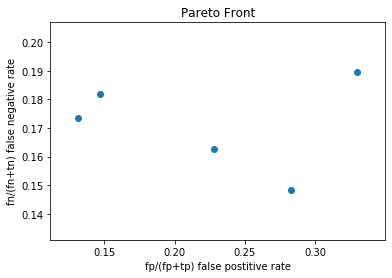

In [37]:
plt.scatter(xlist, ylist)
plt.xlabel("fp/(fp+tp) false postitive rate")
plt.ylabel("fn/(fn+tn) false negative rate")
plt.title("Pareto Front")
plt.show()

In [38]:
print([(xlist[i],ylist[i]) for i in range(len(xlist))])
print(len(xlist))

[(0.22826086956521738, 0.1625615763546798), (0.14666666666666667, 0.18181818181818182), (0.13157894736842105, 0.1735159817351598), (0.2830188679245283, 0.14814814814814814), (0.33, 0.18974358974358974)]
5


In [39]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[158  33]
 [ 37  67]]

True Negatives 158
False Positives 33
False Negatives 37
True Positives 67


Confusion matrix, without normalization
[[158  33]
 [ 37  67]]


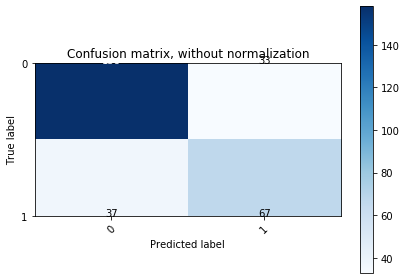

In [40]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [41]:
predictions = svm_clf.predict(test_data.values)

In [42]:
type(predictions)

numpy.ndarray

In [43]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [44]:
pred_df.to_csv('predictions.csv', header=True, sep=',')